In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

/Users/giack/Projects/Learning/MNIST-tensorflow/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/giack/Projects/Learning/MNIST-tensorflow/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the "MNIST Handwritten digits" dataset:

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Prepare the training images:

In [3]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label


ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

## Prepare the testing images:

In [4]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create and train the model:

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


/Users/giack/Projects/Learning/MNIST-tensorflow/env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-07 17:38:25.459493: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6011 - sparse_categorical_accuracy: 0.8291 - val_loss: 0.1698 - val_sparse_categorical_accuracy: 0.9508
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.1380 - sparse_categorical_accuracy: 0.9592 - val_loss: 0.1206 - val_sparse_categorical_accuracy: 0.9636
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.1116 - val_sparse_categorical_accuracy: 0.9652
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0724 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9721
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9768
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0743 - val_sparse_categorical_accuracy: 0.9776


## Visualize the model's structure:

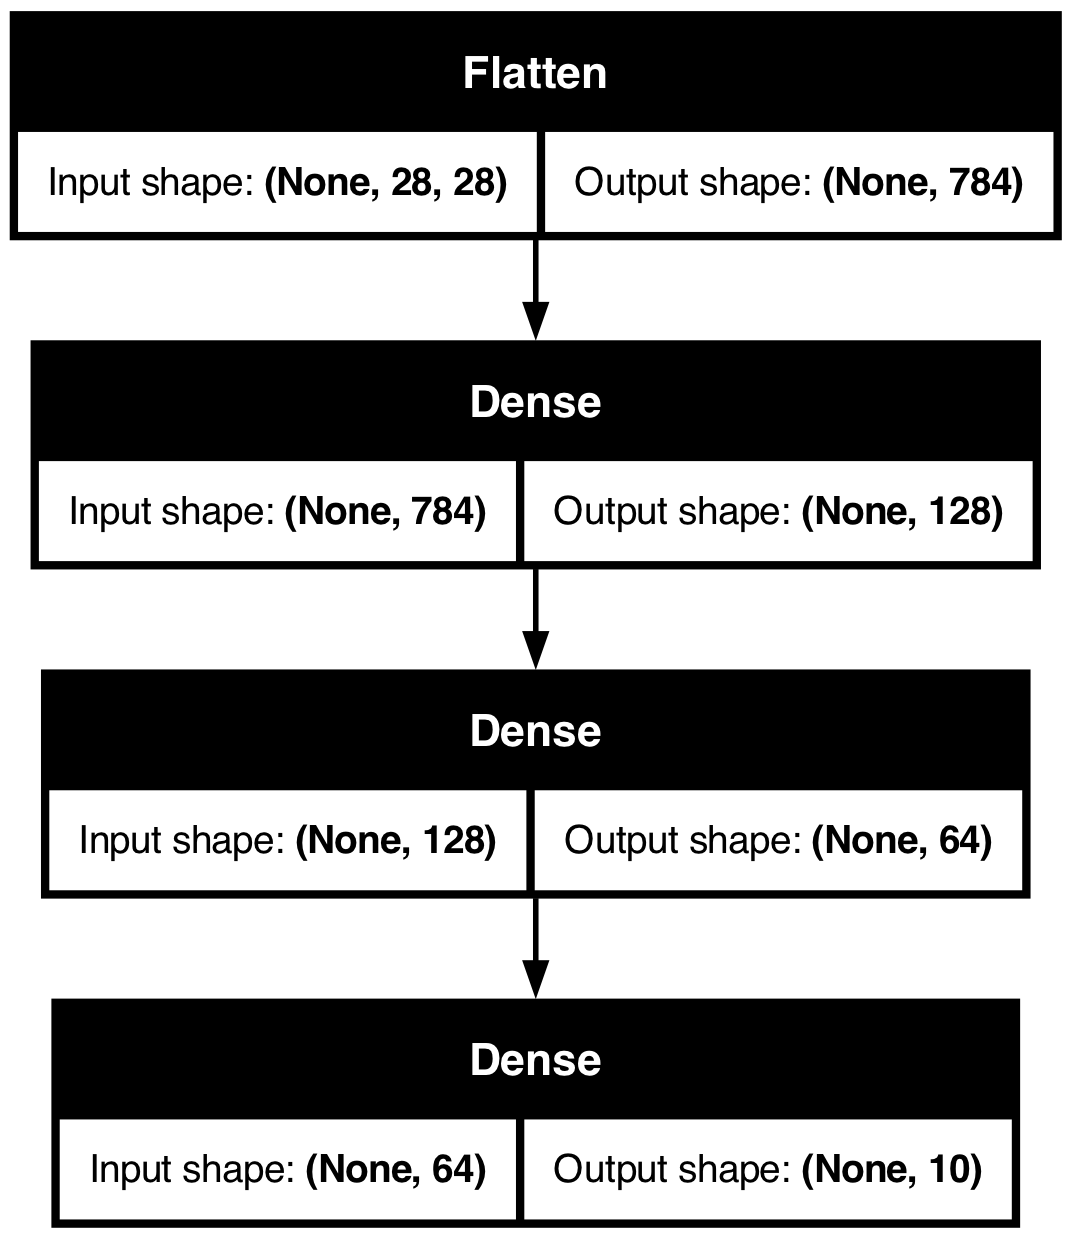

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Visualize the model's results:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


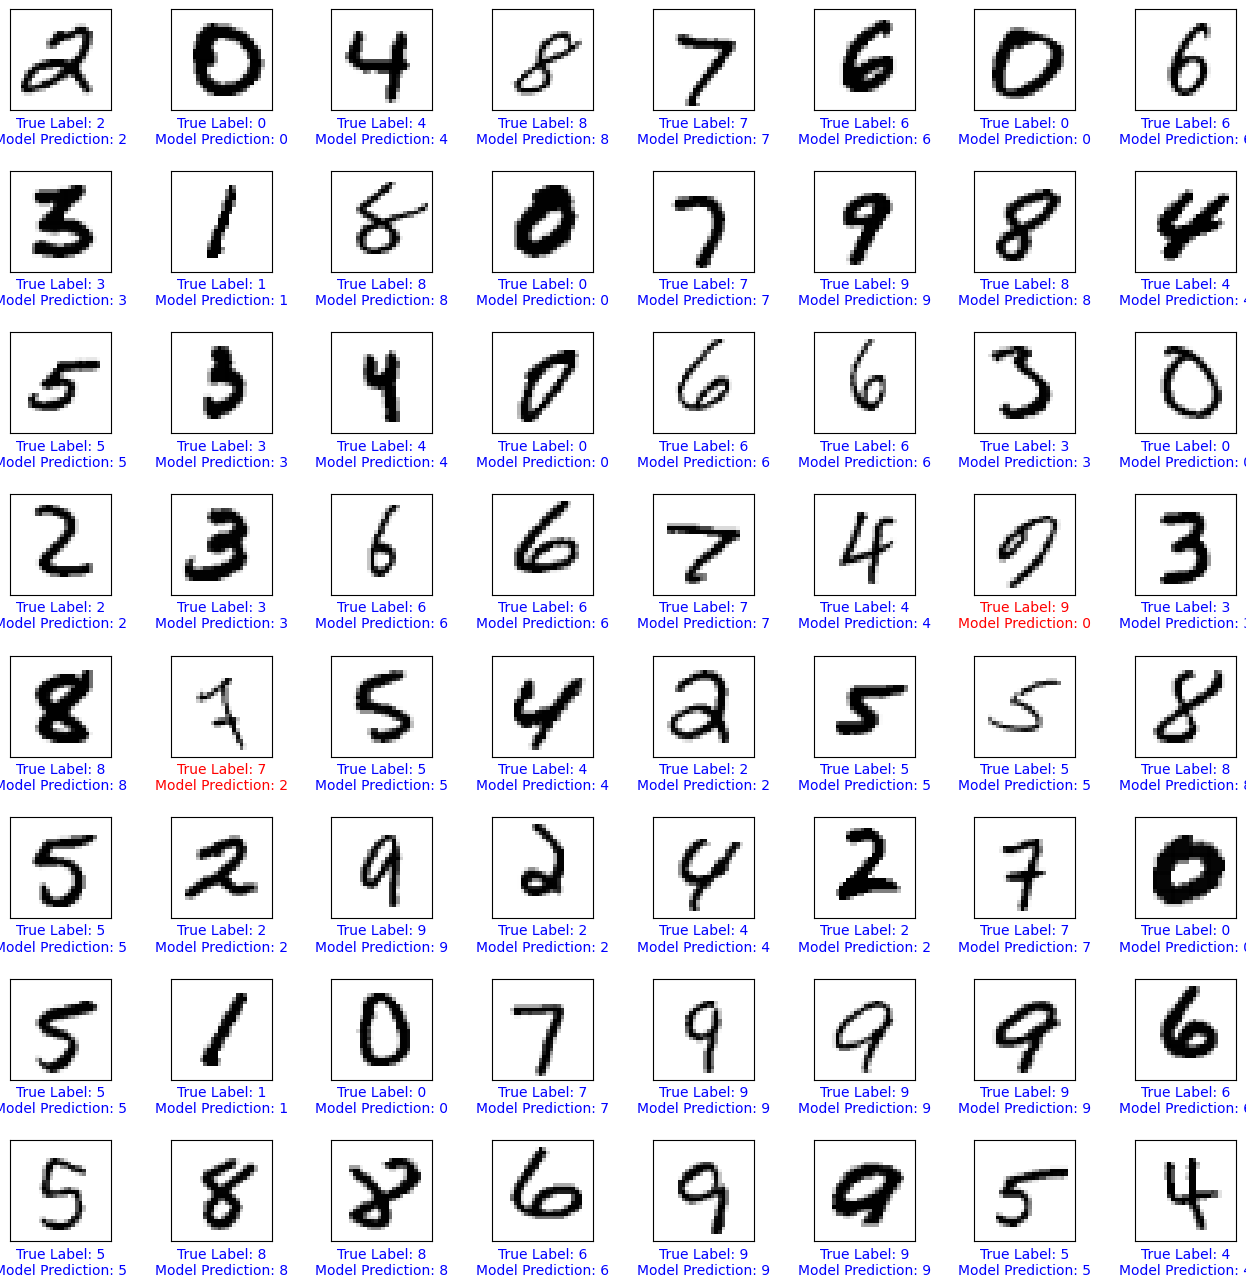

In [12]:
def plot_test_results(model, ds_test):
    test_images, test_labels = next(iter(ds_test))
    test_images, test_labels = test_images.numpy(), test_labels.numpy()

    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(16, 16))
    for i in range(64):
        plt.subplot(8, 8, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        true_label = test_labels[i]
        predicted_label = predicted_labels[i]
        color = "blue" if predicted_label == true_label else "red"
        plt.xlabel(
            f"True Label: {true_label}\nModel Prediction: {predicted_label}",
            color=color,
        )

    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.show()


plot_test_results(model, ds_test)